<a href="https://colab.research.google.com/github/tutty1992/docker-titech/blob/master/210123_Kaggle_Home_Credit_Default_Risk_%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%901.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**基本設定のローディング**

In [2]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

!pip install kaggle
auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/root/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

!kaggle competitions list
!kaggle competitions download -c home-credit-default-risk

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train = pd.read_csv("./application_train.csv.zip")
test = pd.read_csv("./application_test.csv.zip")

train_org = pd.read_csv("./application_train.csv.zip")
test_org = pd.read_csv("./application_test.csv.zip")


bure = pd.read_csv("./bureau.csv.zip")
bure_bal = pd.read_csv("./bureau_balance.csv.zip")
pre_app = pd.read_csv("./previous_application.csv.zip")
cre_car_bal = pd.read_csv("./credit_card_balance.csv.zip")
inst_pay = pd.read_csv("./installments_payments.csv.zip")

import codecs

with codecs.open("./HomeCredit_columns_description.csv", "r", "Shift-JIS", "ignore") as file:
    Expl = pd.read_table(file, delimiter=",")

Expl.query('Table == "application_{train|test}.csv"')

Download 100%.
ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        108           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        220           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        432           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2954           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      23006            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       6157           F

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
117,120,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the...,NaN
118,121,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_WEEK,Number of enquiries to Credit Bureau about the...,NaN
119,122,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the...,NaN
120,123,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the...,NaN


#**特徴量の可視化**
## trainデータをTARGET＝0/1で分類して, 各変数の平均値を取得.
## TARGET=0/1で平均値の差分をプロットすることで, TARGETに対する感度を見る.


In [84]:
train = pd.read_csv("./application_train.csv.zip")
train_x_le = train
test_x_le = test
train_y_le = train["TARGET"]

#それぞれの変数の型を分類
BL_list = ["FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"]
CT_list = ["FLAG_OWN_CAR", "FLAG_OWN_REALTY","NAME_CONTRACT_TYPE", "CODE_GENDER", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE","WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE"]
RN_list = ["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "OWN_CAR_AGE", "CNT_FAM_MEMBERS", "HOUR_APPR_PROCESS_START", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "APARTMENTS_AVG", "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG", "YEARS_BUILD_AVG", "COMMONAREA_AVG", "ELEVATORS_AVG", "ENTRANCES_AVG", "FLOORSMAX_AVG", "FLOORSMIN_AVG", "LANDAREA_AVG", "LIVINGAPARTMENTS_AVG", "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG", "NONLIVINGAREA_AVG", "APARTMENTS_MODE", "BASEMENTAREA_MODE", "YEARS_BEGINEXPLUATATION_MODE", "YEARS_BUILD_MODE", "COMMONAREA_MODE", "ELEVATORS_MODE", "ENTRANCES_MODE", "FLOORSMAX_MODE", "FLOORSMIN_MODE", "LANDAREA_MODE", "LIVINGAPARTMENTS_MODE", "LIVINGAREA_MODE", "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE", "APARTMENTS_MEDI", "BASEMENTAREA_MEDI", "YEARS_BEGINEXPLUATATION_MEDI", "YEARS_BUILD_MEDI", "COMMONAREA_MEDI", "ELEVATORS_MEDI", "ENTRANCES_MEDI", "FLOORSMAX_MEDI", "FLOORSMIN_MEDI", "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI","TOTALAREA_MODE", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "DAYS_LAST_PHONE_CHANGE", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]



#文字列の解凍が入っている要素を数値に変換処理する
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

for c in CT_list:
  le = LabelEncoder()
  #LabelEncoder()はラベルを数値に変換するツール https://gotutiyan.hatenablog.com/entry/2020/09/08/122621#fit
  #print(train_x[c].fillna("NA"))
  le.fit(train_x_le[c].fillna("NA"))
  #各特徴量のラベルが数値に変換される順序でリストを表示
  print(c, " is comprised of ", list(le.classes_)) 
  train_x_le[c] = le.transform(train_x_le[c].fillna("NA"))
  #ラベルエンコーディングは, ラベルを0=>1の標準化する.
  train_x_le[c] = train_x_le[c]/(len(list(le.classes_))-1)
  
for c in RN_list:
  min = train_x_le[c].min()
  Max = train_x_le[c].max()
  train_x_le[c] =   (train_x_le[c] - min)/(Max-min)
  print(train_x_le[c])

T1_described = train_x_le[train_x_le["TARGET"]==1].describe().iloc[1:3,:]
T0_described = train_x_le[train_x_le["TARGET"]==0].describe().iloc[1:3,:]
T1_sub_T0_described = T1_described.sub(T0_described, fill_value=0) *100
#平均値の差を百分率に変換してT1_sub_T0_describedに格納
data_mean = T1_sub_T0_described.loc["mean"]
data_std = T1_sub_T0_described.loc["std"]

FLAG_OWN_CAR  is comprised of  ['N', 'Y']
FLAG_OWN_REALTY  is comprised of  ['N', 'Y']
NAME_CONTRACT_TYPE  is comprised of  ['Cash loans', 'Revolving loans']
CODE_GENDER  is comprised of  ['F', 'M', 'XNA']
NAME_TYPE_SUITE  is comprised of  ['Children', 'Family', 'Group of people', 'NA', 'Other_A', 'Other_B', 'Spouse, partner', 'Unaccompanied']
NAME_INCOME_TYPE  is comprised of  ['Businessman', 'Commercial associate', 'Maternity leave', 'Pensioner', 'State servant', 'Student', 'Unemployed', 'Working']
NAME_EDUCATION_TYPE  is comprised of  ['Academic degree', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Secondary / secondary special']
NAME_FAMILY_STATUS  is comprised of  ['Civil marriage', 'Married', 'Separated', 'Single / not married', 'Unknown', 'Widow']
NAME_HOUSING_TYPE  is comprised of  ['Co-op apartment', 'House / apartment', 'Municipal apartment', 'Office apartment', 'Rented apartment', 'With parents']
OCCUPATION_TYPE  is comprised of  ['Accountants', 'Cleaning sta

## 生成されたデータの中からBoolean型の変数に絞ってプロット.

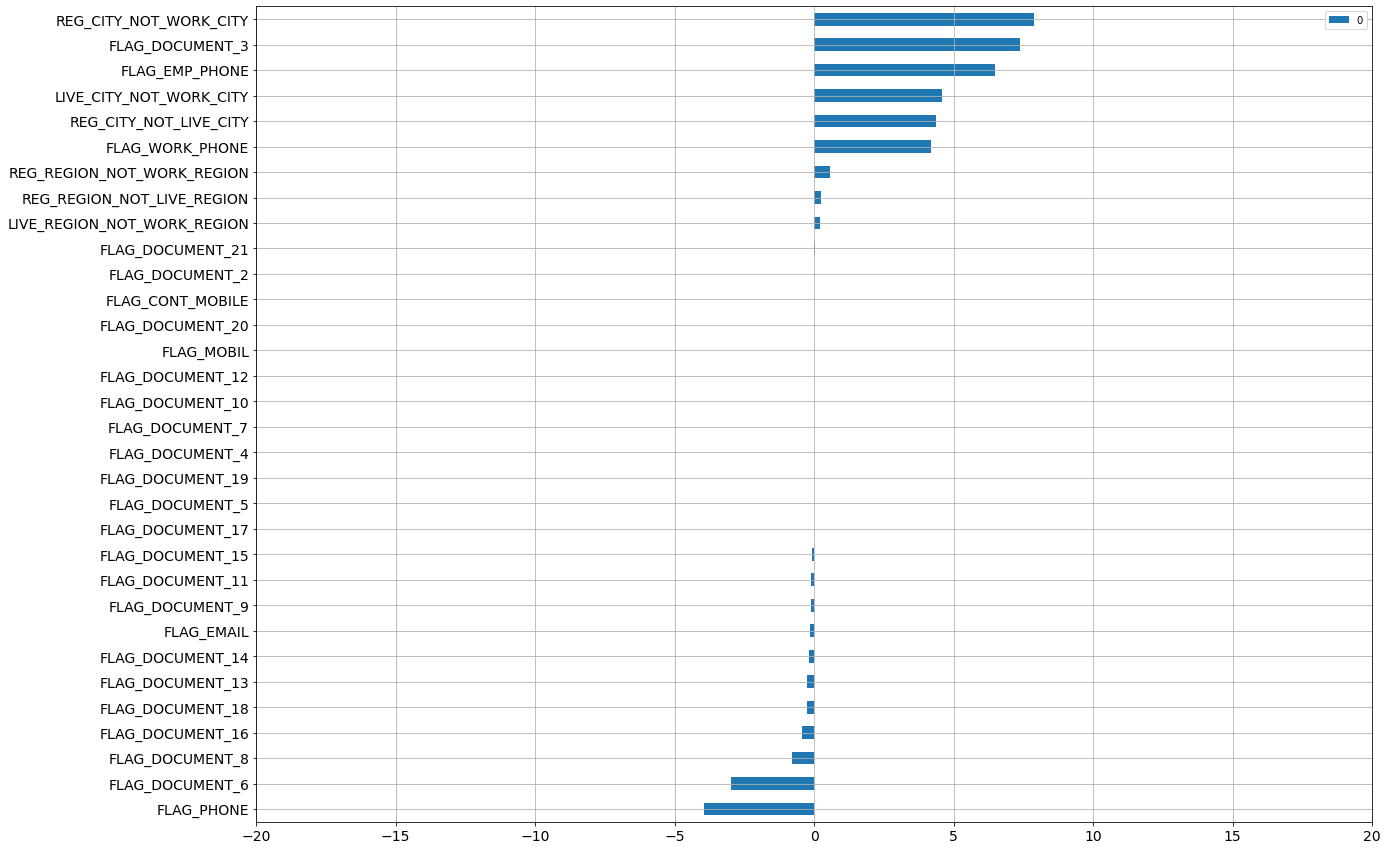

In [90]:
df_BL = pd.DataFrame()

#Boolean型の変数についてdf_BLに平均値の差分[%]を集約.
for c in BL_list:
    s_tmp = pd.Series(data_mean[c], name = c)
    df_BL = df_BL.append(s_tmp)

df_BL.sort_values(ascending=True,by = 0).plot.barh(figsize=(20,15),xlim=(-20,20), grid=True, fontsize=14)
#print(df_BL.sort_values(ascending=True,by = 0))

## グラフの見方
- 正側: **TARGET=1** の集団の平均がxx%だけ高い
- 負側: **TARGET=0** の集団の平均がxx%だけ高い

## Boolean変数をプロットしてわかったこと
### 以下の変数は重要そう+傾向考察
  - REG_CITY_NOT_WORK_CITY: 不履行者は職場と戸籍が別の町
  - FLAG_DOCUMENT_3:重要だが内容不明.
  - FLAG_EMP_PHONE: 有効なWORK PHONE情報を提供したか
  - LIVE_CITY_NOT_WORK_CITY:  不履行者は職場と住所が別の町
  - REG_CITY_NOT_LIVE_CITY: 不履行者は住所と戸籍が別の町
  - FLAG_WORK_PHONE: 不履行者はHOME PHONEを提供している(説明にHOME PHONEとあるが多分WORK PHONEの誤り)
  - FLAG_DOCUMENT_6: 不明.
  - FLAG_OWN_CAR: 不履行者は車を持っていない
  - FLAG_PHONE: 不履行者はHOME PHONEを提供しない

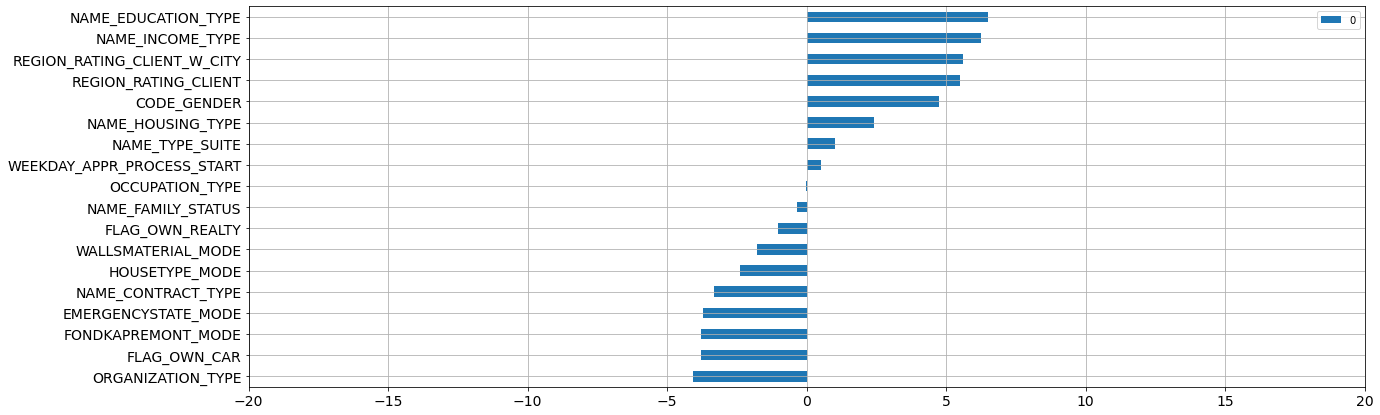

In [91]:
df_CT = pd.DataFrame()

#Boolean型の変数についてdf_BLに平均値の差分[%]を集約.
for c in CT_list:
    s_tmp = pd.Series(data_mean[c], name = c)
    df_CT = df_CT.append(s_tmp)

df_CT.sort_values(ascending=True,by = 0).plot.barh(figsize=(20,7),xlim=(-20,20), grid=True, fontsize=14)
print(df_CT.sort_values(ascending=True,by = 0))

## カテゴリ変数をプロットしてわかったこと
### 以下の変数は重要そう+傾向考察
- NAME_EDUCATION_TYPE
- NAME_INCOME_TYPE
- REGION_RATING_CLIENT_W_CITY
- REGION_RATING_CLIENT
- CODE_GENDER
- HOUSETYPE_MODE
- NAME_CONTRACT_TYPE
- EMEGENCYSTATE_MODE
- FONDKAPREMONT_MODE
- FLAG_OWN_CAR
- ORGANIZATON_TYPE

                                    0
EXT_SOURCE_3               -14.545499
EXT_SOURCE_2               -13.163019
EXT_SOURCE_1               -13.130459
DAYS_EMPLOYED               -6.081474
REGION_POPULATION_RELATIVE  -2.617218
...                               ...
OWN_CAR_AGE                  1.904561
DAYS_REGISTRATION            2.200122
DAYS_LAST_PHONE_CHANGE       3.904741
DAYS_ID_PUBLISH              3.961653
DAYS_BIRTH                   7.065098

[70 rows x 1 columns]


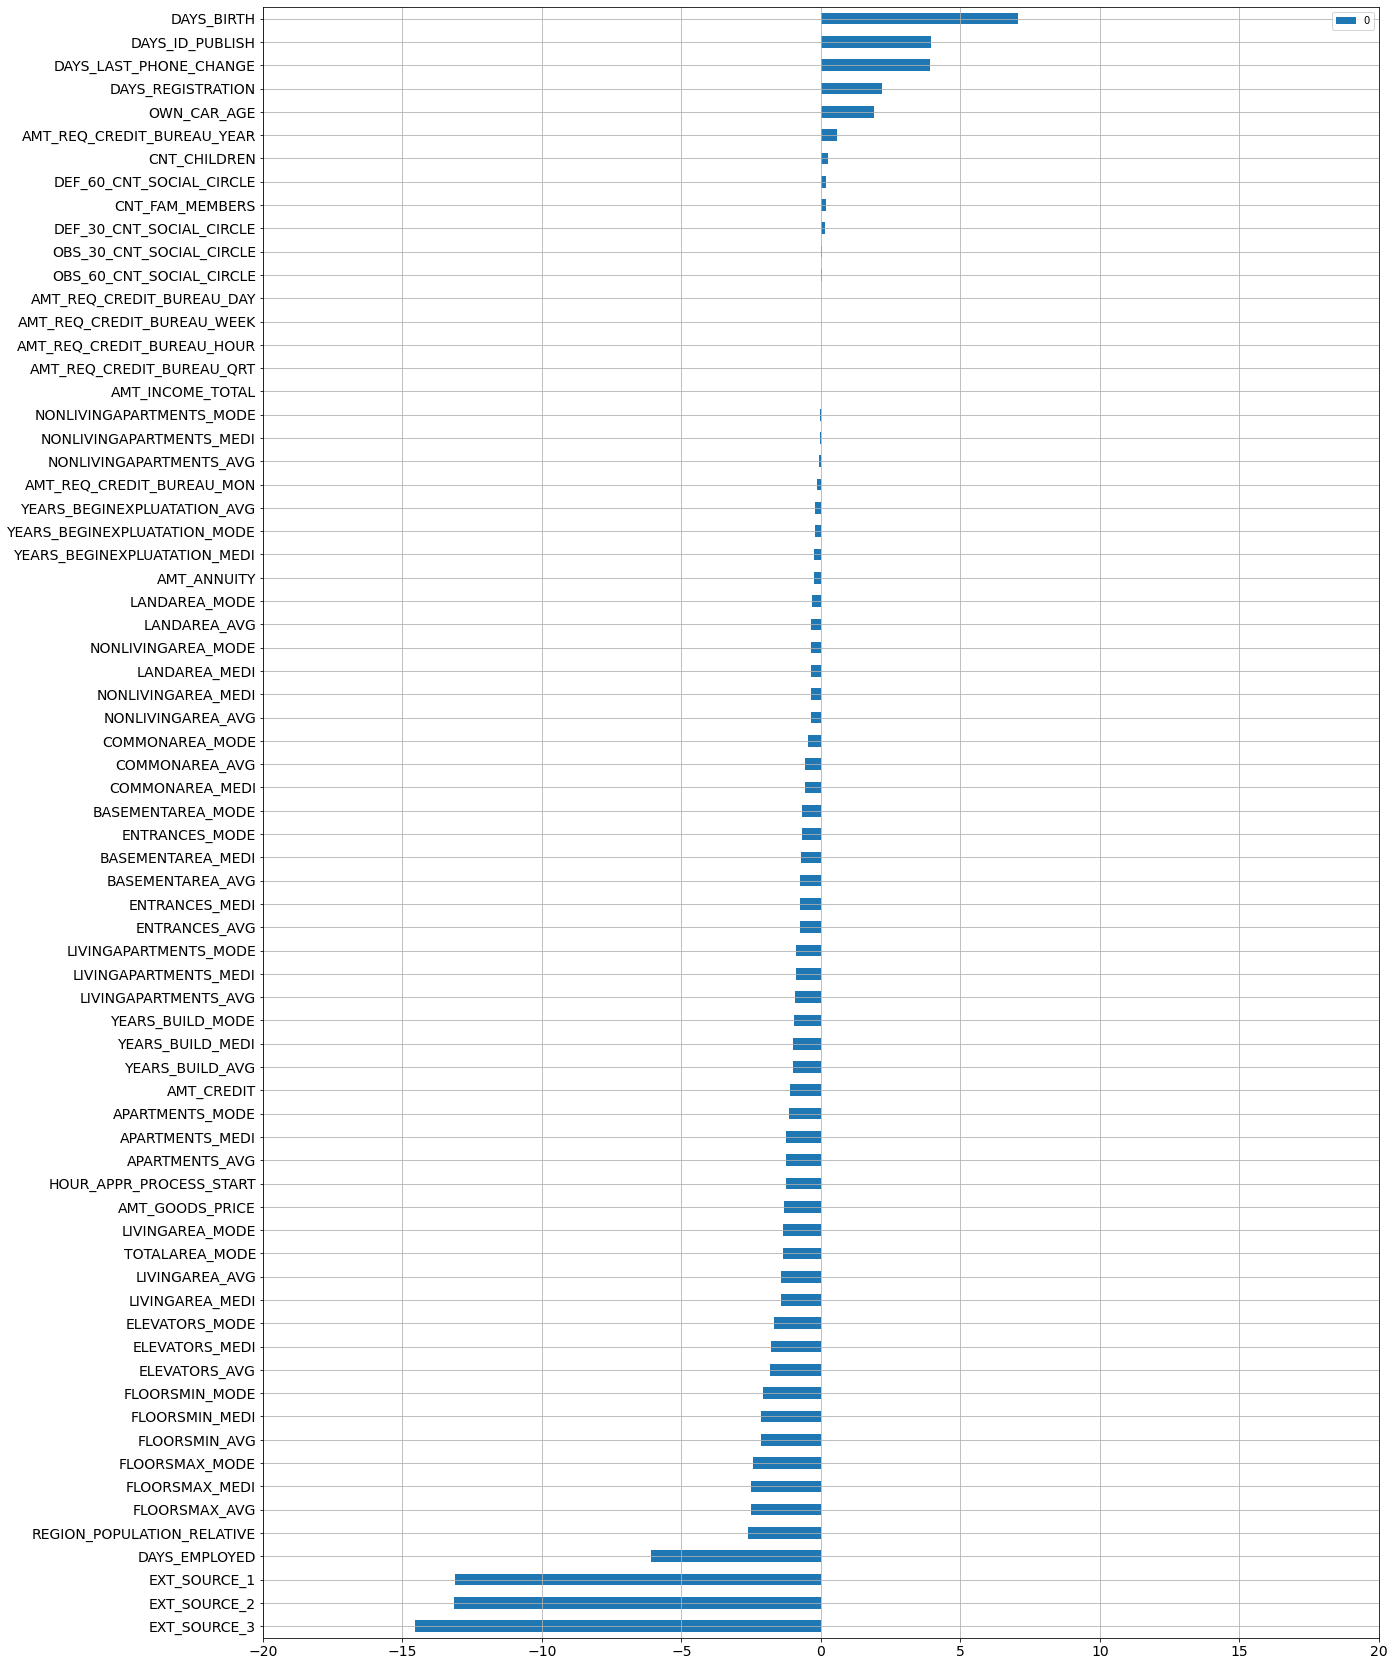

In [92]:
df_RN = pd.DataFrame()

#Boolean型の変数についてdf_BLに平均値の差分[%]を集約.
for c in RN_list:
    s_tmp = pd.Series(data_mean[c], name = c)
    df_RN = df_RN.append(s_tmp)

df_RN.sort_values(ascending=True,by = 0).plot.barh(figsize=(20,30),xlim=(-20,20), grid=True, fontsize=14)
print(df_RN.sort_values(ascending=True,by = 0))

## カテゴリ変数をプロットしてわかったこと
### 以下の変数は重要そう+傾向考察
- DAYS_BIRTH
- DAYS_ID_PUBLISH
- DAYS_LAST_PHONE_CHANGE
- DAYS_EMPLOYED
- EXT_SOURCE_1
- EXT_SOURCE_2
- EXT_SOURCE_3